In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
df.shape

(768, 9)

In [6]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
corr_matrix = df.corr()

Let's see correlation between columns in this dataset

In [11]:
corr_matrix.style.background_gradient(cmap="coolwarm")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [12]:
df.corrwith(df.Outcome).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
dtype: float64

In [13]:
x = df.drop('Outcome', axis=1)
y = df.Outcome

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2)

In [17]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [51]:
knn = KNeighborsClassifier(n_neighbors=17)

In [52]:
knn.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=17)

In [53]:
predict = knn.predict(test_x)

In [54]:
from sklearn.metrics import jaccard_score

In [55]:
jaccard = jaccard_score(test_y, predict)
jaccard

0.45614035087719296

In [56]:
from sklearn.metrics import classification_report

In [57]:
print(classification_report(test_y, predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       109
           1       0.68      0.58      0.63        45

    accuracy                           0.80       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154



<Axes: >

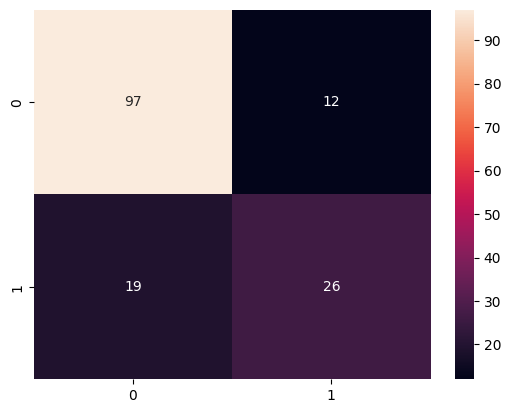

In [58]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_y, predict), annot=True)

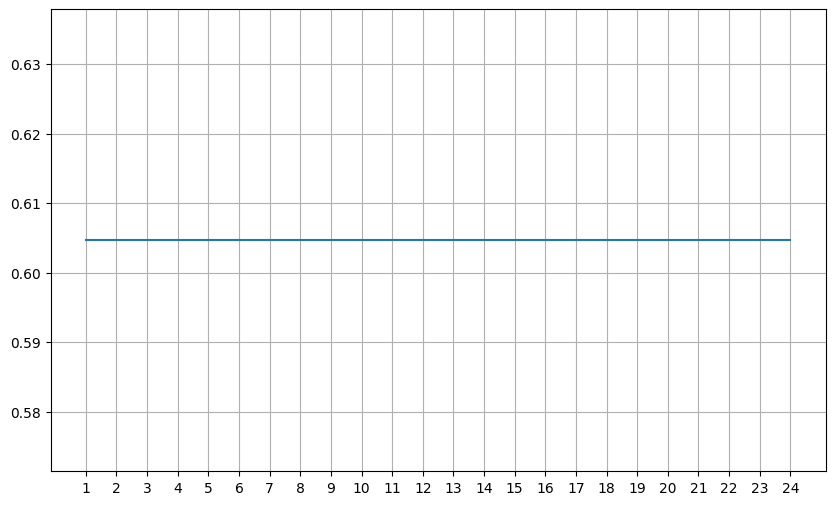

In [48]:
from sklearn.metrics import f1_score
f1 = []
for k in range(1,25):
    knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
    knn.fit(train_x, train_y)
    y_predict = knn.predict(test_x)
    f1.append(f1_score(test_y, predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,25),f1)
plt.xticks(range(1,25))
plt.grid()
plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(x, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [50]:
knn_gscv.best_params_

{'n_neighbors': 17}